In [9]:
import scipy as sp
import scipy.integrate as sp_int
import matplotlib.pyplot as plt
import math
import numpy as np

In [19]:
def powerlaw_p_vec(alpha:float, max_deg:int):
    """
    Create the power law probability vector, required for the powerlaw probability generating function below
    """
    dist = [0]*(max_deg+1)
    alpha = float(alpha)
    denom = 0.0
    for i in range(1, max_deg+1):
        denom += i**(-1*alpha)
    for k in range(1, max_deg+1):
        dist[k] = k**(-1*alpha)/denom
    
    return dist

def calc_g(p_vec, x):
    """
    Probability generating function for generic powerlaw distribution
    """
    g_val = 0
    for k in range(len(p_vec)):
        g_val = g_val + p_vec[k]*x**(k)
    return g_val

def calc_g1(p_vec, x):
    """
    First derivative Probability generating function for generic powerlaw distribution
    """
    g_val = 0
    for k in range(len(p_vec)):
        g_val = g_val + (k)*p_vec[k]*x**(k-1)
    return g_val

def calc_g2(p_vec, x):
    """
    Second derivate Probability generating function for generic powerlaw distribution
    """
    g_val = 0
    for k in range(len(p_vec)):
        g_val = g_val + (k)*(k-1)*p_vec[k]*x**(k-2)
    return g_val

In [4]:
def calc_poisson_g(lambda_g, x):
    """
    Probability generating function for poisson distribution
    """
    
    return math.e**(lambda_g * (x-1)) 

def calc_poisson_g_fd(lambda_g, x):
    """
    First derivative Probability generating function for poisson distribution
    """
    
    return lambda_g * math.e*(lambda_g * (x-1)) 

def calc_poisson_g_fdd(lambda_g, x):
    """
    Second derivative Probability generating function for poisson distribution
    """
    
    return (lambda_g**2) * math.e**(lambda_g * (x-1)) 

def powerlaw_p_vec(alpha:float, max_deg:int):
    """
    Create the power law probability vector, required for the powerlaw probability generating function below
    """
    dist = [0]*(max_deg+1)
    alpha = float(alpha)
    denom = 0.0
    for i in range(1, max_deg+1):
        denom += i**(-1*alpha)
    for k in range(1, max_deg+1):
        dist[k] = k**(-1*alpha)/denom
    
    return dist

def calc_powerlaw_g(p_vec, x):
    """
    Probability generating function for generic powerlaw distribution
    """
    g_val = 0
    for k in range(len(p_vec)):
        g_val = g_val + p_vec[k]*x**(k)
    return g_val

def calc_powerlaw_g_fd(p_vec, x):
    """
    First derivative Probability generating function for generic powerlaw distribution
    """
    g_val = 0
    for k in range(len(p_vec)):
        g_val = g_val + (k)*p_vec[k]*x**(k-1)
    return g_val

def calc_powerlaw_g_fd(p_vec, x):
    """
    Second derivate Probability generating function for generic powerlaw distribution
    """
    g_val = 0
    for k in range(len(p_vec)):
        g_val = g_val + (k)*(k-1)*p_vec[k]*x**(k-2)
    return g_val



In [23]:
def calc_g(lambda_g, x):
    """
    Probability generating function for poisson distribution
    """
    
    return math.e**(lambda_g * (x-1)) 

def calc_g1(lambda_g, x):
    """
    First derivative Probability generating function for poisson distribution
    """
    
    return lambda_g * math.e*(lambda_g * (x-1)) 

def calc_g2(lambda_g, x):
    """
    Second derivative Probability generating function for poisson distribution
    """
    
    return (lambda_g**2) * math.e**(lambda_g * (x-1)) 

In [24]:
def derv(x, t, lam, rr, mm, pp):
    #y[0]= change of theta 
    #y[1]= change of p_infec 
    #y[2]= change of p_suscep 
    #y[3]= proportion of S 
    #y[4]= change of M_I 
    #y[5]= change of I
    
    # y = np.zeros(6)
    # y[0] = -rr * x[1] * x[0]
    # y[1] = rr * x[2] * x[1] * x[0] * \
    # calc_powerlaw_g(lam, x[0])/calc_powerlaw_g_fd(lam, x[0])\
    # - rr*x[1]*(1-x[1])-x[1]*mm+pp*(x[4]-x[1])
    # y[2] = rr * x[2]
    
    y=np.zeros(6);
    y[0]=-rr*x[1]*x[0] 
    y[1]=rr*x[2]*x[1]*x[0]*calc_g2(lam,x[0])/calc_g1(lam,x[0])-rr*x[1]*(1-x[1])-x[1]*mm+pp*(x[4]-x[1]) 
    y[2]=rr*x[2]*x[1]*(1-x[0]*calc_g2(lam,x[0])/calc_g1(lam,x[0]))+pp*(x[0]*calc_g1(lam,x[0])/calc_g1(lam,1)-x[2])
    y[3]=-rr*x[1]*x[0]*calc_g1(lam,x[0]) 
    y[4]=-mm*x[4]+rr*x[1]*(x[0]**2*calc_g2(lam,x[0])+x[0]*calc_g1(lam,x[0])/calc_g1(lam,1)) 
    y[5]=rr*x[1]*x[0]*calc_g1(lam,x[0])-mm*x[5]
    
    return(y)

In [54]:
N = 10_000
episilon = 0.0001

time = list(range(0,200))#np.linspace(0, 200, 1)
lamda = 2.5
r = 0.2
mu = 0.2
ro = 0.2


    #y[0]= change of theta 
    #y[1]= change of p_infec 
    #y[2]= change of p_suscep 
    #y[3]= proportion of S 
    #y[4]= change of M_I 
    #y[5]= change of I
    
init = [1 - episilon, 
        episilon/(1-episilon), 
        (1 - (2*episilon))/(1 - episilon), 
       calc_g(lamda, 1 - episilon),
       episilon, 
       1 - calc_g(lamda, 1 - episilon)]

In [56]:
init

[0.9999,
 0.00010001000100010001,
 0.9998999899989999,
 0.999750031247396,
 0.0001,
 0.00024996875260396845]

In [57]:
out=sp_int.odeint(derv, init, time, args=(lamda,r,mu,ro))

<ipython-input-24-aed0274ad1ce>:19: RuntimeWarning: divide by zero encountered in double_scalars
  y[2]=rr*x[2]*x[1]*(1-x[0]*calc_g2(lam,x[0])/calc_g1(lam,x[0]))+pp*(x[0]*calc_g1(lam,x[0])/calc_g1(lam,1)-x[2])
<ipython-input-24-aed0274ad1ce>:21: RuntimeWarning: divide by zero encountered in double_scalars
  y[4]=-mm*x[4]+rr*x[1]*(x[0]**2*calc_g2(lam,x[0])+x[0]*calc_g1(lam,x[0])/calc_g1(lam,1))


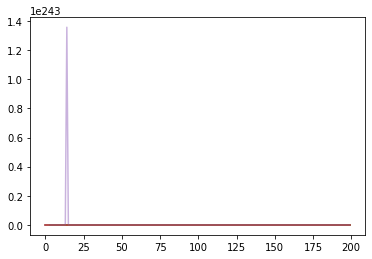

In [72]:
plt.plot(out[:,0], alpha =0.5)
plt.plot(out[:,1])
plt.plot(out[:,2])
plt.plot(out[:,3])
plt.plot(out[:,4], alpha = 0.5)
plt.plot(out[:,5], alpha = 0.5)


In [ ]:
# poisson NE model

In [102]:
def calc_g(lambda_g, x):
    """
    Probability generating function for poisson distribution
    """
    
    return math.e**(lambda_g * (x-1)) 

def calc_g1(lambda_g, x):
    """
    First derivative Probability generating function for poisson distribution
    """
    
    return lambda_g * math.e**(lambda_g * (x-1)) 

def calc_g2(lambda_g, x):
    """
    Second derivative Probability generating function for poisson distribution
    """
    return (lambda_g**2) * math.e**(lambda_g * (x-1)) 

# def calc_g(lamda,x): 
#     g_val=math.e**(lamda*(x-1)) 
#     return g_val
# def calc_g1(lamda,x): 
#     g_val=lamda*math.e**(lamda*(x-1)) 
#     return g_val
# def calc_g2(lamda,x): 
#     g_val=(lamda**2)*math.e**(lamda*(x-1)) 
#     return g_val

In [267]:
def derv(x,t,lam,rr,mm,pp):
    #y[0]= change of theta 
    #y[1]= change of p_infec 
    #y[2]= change of p_suscep 
    #y[3]= proportion of S 
    #y[4]= change of M_I 
    #y[5]= change of I
    y=list(range(6))#zeros(6);
    y[0]=-rr*x[1]*x[0] 
    y[1]=rr*x[2]*x[1]*x[0]*calc_g2(lam,x[0])/calc_g1(lam,x[0])-rr*x[1]*(1-x[1])-x[1]*mm+pp*(x[4]-x[1]) 
    y[2]=rr*x[2]*x[1]*(1-x[0]*calc_g2(lam,x[0])/calc_g1(lam,x[0]))+pp*(x[0]*calc_g1(lam,x[0])/calc_g1(lam,1)-x[2])
    y[3]=-rr*x[1]*x[0]*calc_g1(lam,x[0]) 
    y[4]=-mm*x[4]+rr*x[1]*(x[0]**2*calc_g2(lam,x[0])+x[0]*calc_g1(lam,x[0])/calc_g1(lam,1)) 
    y[5]=rr*x[1]*x[0]*calc_g1(lam,x[0])-mm*x[5]
    return(y)

lamda = 2.5
r = 0.2
mu = 0.2
ro = 0.2
epsilon = 0.001

init = [1 - episilon,
       epsilon / (1 - epsilon),
       (1 - 2*epsilon)/(1 - epsilon),
       calc_g(lamda, 1 - epsilon),
       epsilon,
       1 - calc_g(lamda, 1- epsilon)]

out=sp_int.odeint(derv, init, time, args=(lamda,r,mu,ro))

In [268]:
# out

In [269]:
# plt.plot(out[:,0], alpha =0.5)
# plt.plot(out[:,1])
# plt.plot(out[:,2])
# plt.plot(out[:,3])
# plt.plot(out[:,4], alpha = 0.5)
# plt.plot(out[:,5], alpha = 0.5)



In [270]:
# plt.plot(out[:,0], alpha =0.5)
# plt.plot(out[:,1])
# plt.plot(out[:,2])
# plt.plot(out[:,3])
# plt.plot(out[:,4], alpha = 0.5)
# plt.plot(out[:,5], alpha = 0.5)




In [271]:
# J = I + R

In [272]:
N = 10_000
pop_tap = out *N

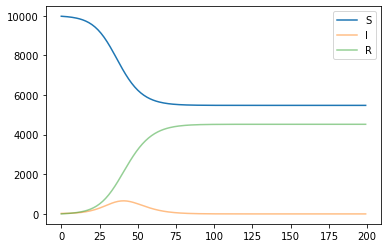

In [273]:
# plt.plot(pop_tap[:,0], alpha =0.5) # change of theta
# plt.plot(pop_tap[:,1])#
# plt.plot(pop_tap[:,2])
plt.plot(pop_tap[:,3], label = 'S')
# plt.plot(pop_tap[:,4], alpha = 0.5)
plt.plot(pop_tap[:,5], alpha = 0.5, label = 'I')
# recovered
plt.plot(10_000 - (pop_tap[:,5]+pop_tap[:,3]), alpha = 0.5, label= 'R')
plt.legend()

In [274]:
N - (pop_tap[:,5]+pop_tap[:,3])[199:]

array([4522.65942243])

In [275]:
pop_tap[:,5].sum()

22625.780909854468

In [ ]:
# total epidemic 3716.18 people. 

array([10000.        ,  9999.67107445,  9999.64889234,  9999.4957714 ,
        9998.91894075,  9997.65041002,  9995.36452835,  9991.60222899,
        9985.67896556,  9976.5536815 ,  9962.62983832,  9941.45041259,
        9909.24444358,  9860.30492587,  9786.2715867 ,  9675.60433111,
        9513.82864398,  9285.26112234,  8976.46817057,  8580.60751079,
        8100.80722374,  7550.87109113,  6952.91880118,  6333.038585  ,
        5716.66828045,  5125.09930289,  4573.69826637,  4071.70776883,
        3623.09375659,  3227.85519952,  2883.35923634,  2585.46317331,
        2329.34385068,  2110.05057878,  1922.83836964,  1763.34472696,
        1627.66426402,  1512.36151015,  1414.44940885,  1331.35095182,
        1260.85455273,  1201.06890352,  1150.38046966,  1107.41493127,
        1071.00305957,  1040.15090254,  1014.01401702,   991.8753012 ,
         973.12600924,   957.24954406,   943.80759039,   932.42837648,
         922.79662018,   914.64499436,   907.74690503,   901.91024931,
      